In [1]:
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

In [2]:
# files
fstdev = "../data/external/best_means.txt"
frolled_annotations = "../data/processed/annotations_rolled.txt"

In [3]:
with open(fstdev, 'r') as f:
    data = f.readline()
    data = [float(x.strip()) for x in data.split(",")]

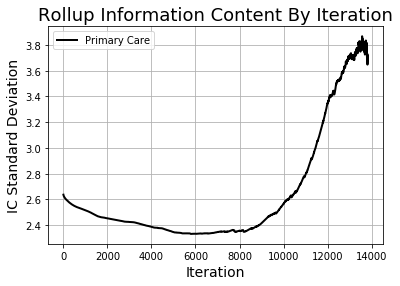

In [4]:
fig,ax = plt.subplots()
x = x = np.arange(1,len(data)+1)
ax.plot(x, data, '-',color='0', label='Primary Care''',lw=2)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('IC Standard Deviation',fontsize=14)
#plt.ylim([0.0, 1.05])
#plt.xlim([0.0, 1.0])
plt.grid()
plt.legend(loc="upper left")
#ax.xaxis.set_ticks(np.arange(0, 1, 0.1))
plt.title('Rollup Information Content By Iteration', fontsize=18)
# save to pdf
pdf = PdfPages("../reports/rollup_fig1.pdf")
pdf.savefig(dpi=300, bbox_inches='tight', pad_inches=.15)
pdf.close()

In [17]:
annotations_rolled = {}
with open(frolled_annotations, 'r') as f:
    for line in f.readlines():
        data = line.split(":")
        cid = int(data[0].strip())
        annotations = [int(x.strip()) for x in data[1].split(",")]
        annotations_rolled[cid] = annotations

In [18]:
annotation_counts = {}
inverted_annotation_counts = {}
for cid, l in annotations_rolled.items():
    cnt = len(l)
    annotation_counts[cid] = cnt
    if cnt in inverted_annotation_counts:
        inverted_annotation_counts[cnt].append(cid)
    else:
        inverted_annotation_counts[cnt]=[cid]

In [19]:
sorted_count_keys = sorted(list(inverted_annotation_counts.keys()))

In [29]:
line = ''
start = 0
stop = 20
for key in sorted_count_keys[start:stop]:
    cids = inverted_annotation_counts[key]
    for cid in cids:
        line = "{0},{1}".format(line,cid)
print(line[1:])

4120330,4239725,4164770,46273429,4232209,4000634,437363,374925,312927,4181334,4315164,4224489,4180167,194585,4160643,4134442,4179095,40481910,4046000,42709797,4028365,4153882,439842,316139,4262590,4174262,436581,4111798,4127855,4123594,4232106,80482,4043716,373432,4115390,4345594,197506,4186162,4200648,444200,4130986,4130839,434842


In [44]:
total_annotations = 0
for l in annotation_counts.values():
    total_annotations += l
total_annotations

14920325

In [57]:
cum_percents = []
cc = 0
for idx in reversed(sorted_count_keys):
    for cid in inverted_annotation_counts[idx]:
        na = annotation_counts[cid]
        cp = (na+cc)/total_annotations*100
        cum_percents.append(cp)
        cc += na

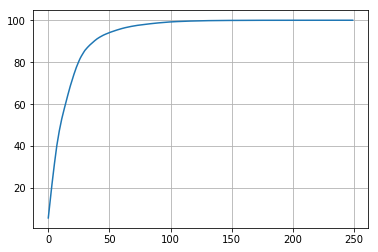

In [58]:
plt.plot(cum_percents)
plt.grid()